# Tugas 3 : Crawling dan Struktur Mining  

Pada tugas ini diminta untuk mencoba crawling pada website PTA Trunojoyo dan berita online serta melakukan struktur web mining

Penulis:

*   Nama : Willy Chairullah Fauzi Putra
*   NIM : 220411100045
*   Kelas: PPW


## Crawling PTA Trunojoyo

### install package

In [16]:
# %pip install --quiet builtwith
# %pip install --quiet requests 
# %pip install --quiet beautifulsoup4 

### import library

In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

### Proses Crawling PTA

In [18]:
data = {"penulis": [], "judul": [], "abstrak_indo": [], "abstrak_english": [], "pembimbing_pertama": [], "pembimbing_kedua": [], "prodi": []}

def pta():
    byProd = 1
    beforeProdiFound = True
    prodiFound = True

    # Hilangkan kondisi byProd jika ingin crawling semua
    while (prodiFound or beforeProdiFound) and byProd <= 2 :
        beforeProdiFound = prodiFound

        url = "https://pta.trunojoyo.ac.id/c_search/byProd/{}".format(byProd)
        r = requests.get(url)
        request = r.content
        soup = BeautifulSoup(request, "html.parser")

        prodi_element = soup.select_one('h2:contains("Journal Jurusan")')

        # Pastikan untuk memeriksa apakah ada nama prodi
        if prodi_element:
            prodi = prodi_element.text.split(' Jurusan ')[1]
            prodiFound = True
        if prodi == '':
            prodiFound = False

        print(f"{byProd}. {prodi}")

        jurnalFound = True
        pageProd = 1

        jurnal_ke = 1

        # Hilangkan kondisi pageProd jika ingin crawling semua
        while jurnalFound and pageProd <= 2:

            url = "https://pta.trunojoyo.ac.id/c_search/byProd/{}/{}".format(byProd,pageProd)
            r = requests.get(url)
            request = r.content
            soup = BeautifulSoup(request, "html.parser")

            jurnals = soup.select('li[data-cat="#luxury"]')
            if len(jurnals) < 1:
                jurnalFound = False

            # Menggunakan while loop untuk memproses jurnal
            jurnal_index = 0
            while jurnal_index < len(jurnals):
                jurnal = jurnals[jurnal_index]
                try:
                    response = requests.get(jurnal.select_one('a.gray.button')['href'])
                    soup1 = BeautifulSoup(response.content, "html.parser")

                    isi = soup1.select_one('div#content_journal')

                    judul = isi.select_one('a.title').text

                    penulis = isi.select_one('span:contains("Penulis")').text.split(' : ')[1]

                    pembimbing_pertama = isi.select_one('span:contains("Dosen Pembimbing I")').text.split(' : ')[1]

                    pembimbing_kedua = isi.select_one('span:contains("Dosen Pembimbing II")').text.split(' :')[1]

                    abstrak = isi.select('p[align="justify"]')
                    # Mengambil abstrak Indonesia dan Inggris
                    abstrak_indo = abstrak[0].text if len(abstrak) > 0 else "No Indonesian abstract"
                    abstrak_english = abstrak[1].text if len(abstrak) > 1 else "No English abstract"

                    data["penulis"].append(penulis)
                    data["judul"].append(judul)
                    data["pembimbing_pertama"].append(pembimbing_pertama)
                    data["pembimbing_kedua"].append(pembimbing_kedua)
                    data["abstrak_indo"].append(abstrak_indo)
                    data["abstrak_english"].append(abstrak_english)
                    data["prodi"].append(prodi)

                    print(f"{jurnal_ke}  Berhasil crawl: {judul[:50]}...")

                except Exception as e:
                    print(f"  Error processing jurnal {jurnal_index}: {e}")

                # Pindah Jurnal
                jurnal_index += 1
                jurnal_ke += 1

            # Pindah Pagination / Halaman
            pageProd += 1

        # Mengubah kondisi Jurnal True
        jurnalFound = True

        # Pindah Prodi
        byProd += 1

    df = pd.DataFrame(data)
    df.to_csv("pta.csv", index=False)

    print(f"\nData berhasil disimpan: {len(df)} records")
    print(f"Kolom: {list(df.columns)}")
    return df

### Menjalankan fungsi crawling

In [19]:
import time
start_time = time.time()

df_result = pta()

end_time = time.time()
print(f"\nWaktu total crawling: {(end_time - start_time):.2f} detik")
print(f"Rata-rata per record: {(end_time - start_time)/len(df_result):.2f} detik")

1. Ilmu Hukum
1  Berhasil crawl: Implementasi Fungsi Legislasi Dewan Perwakilan Rak...
2  Berhasil crawl: Pertanggungjawaban Pidana Direksi BUMN (Persero)
...
3  Berhasil crawl: Analisis Terhadap Kekosongan Hukum dalam Pengawasa...
4  Berhasil crawl: PERLINDUNGAN HUKUM BAGI KONSUMEN ATAS PRODUK ELEKT...
5  Berhasil crawl: TELAAH  KRITIS TENTANG ALASAN HUKUM YANG DIGUNAKAN...
6  Berhasil crawl: TELAAH KRITIS TENTANG
PEMBERITAAN MEDIA MASSA TER...
7  Berhasil crawl: PELAKSANAAN PENDAFTARAN TANAH UNTUK PERTAMA KALI D...
8  Berhasil crawl: TRANSAKSI JUAL BELI MELALUI INTERNET PERSPEKTIF SY...
9  Berhasil crawl: PELAKSANAAN MORATORIUM PENGIRIMAN TENAGA KERJA IND...
10  Berhasil crawl: ASPEK PIDANA DALAM JUAL BELI OLI BEKAS KAPAL DI PE...
2. Teknologi Industri Pertanian
1  Berhasil crawl: Sifat Fisik dan Profil Gelatinisasi Tepung Uwi Ung...
2  Berhasil crawl: PENGARUH KONSENTRASI FLOKULAN (MAGNAFLOC LT 27 P) ...
3  Berhasil crawl: Optimasi Penggunaan Tepung Labu Kuning dan Gum Ara...
4  Ber

### Memuat dan menampilkan hasil crawling

In [20]:
df = pd.read_csv("pta.csv")

print("=== STATISTIK HASIL CRAWLING ===")
print(f"Total records: {len(df)}")
print(f"Kolom: {list(df.columns)}")
print()

# Statistik per prodi
print("=== DISTRIBUSI PER PRODI ===")
prodi_counts = df['prodi'].value_counts()
print(prodi_counts)
print()

# Contoh data
print("=== CONTOH DATA ===")
for i in range(min(3, len(df))):
    print(f"\n--- Record {i+1} ---")
    print(f"Prodi: {df.iloc[i]['prodi']}")
    print(f"Judul: {df.iloc[i]['judul'][:80]}...")
    print(f"Penulis: {df.iloc[i]['penulis']}")
    print(f"Abstrak Indo: {df.iloc[i]['abstrak_indo'][:100]}...")
    print("-" * 80)

=== STATISTIK HASIL CRAWLING ===
Total records: 20
Kolom: ['penulis', 'judul', 'abstrak_indo', 'abstrak_english', 'pembimbing_pertama', 'pembimbing_kedua', 'prodi']

=== DISTRIBUSI PER PRODI ===
prodi
Ilmu Hukum                      10
Teknologi Industri Pertanian    10
Name: count, dtype: int64

=== CONTOH DATA ===

--- Record 1 ---
Prodi: Ilmu Hukum
Judul: Implementasi Fungsi Legislasi Dewan Perwakilan Rakyat Daerah Kabupaten Bangkalan...
Penulis: Dyah Ayu Citra Seza
Abstrak Indo: ABSTRAK

       Implementasi Fungsi Legislasi DPRD Kabupaten Bangkalan Periode 2009-2014 Dalam Pem...
--------------------------------------------------------------------------------

--- Record 2 ---
Prodi: Ilmu Hukum
Judul: Pertanggungjawaban Pidana Direksi BUMN (Persero)
(Anotasi Putusan No. 1144 K/Pi...
Penulis: Maulina Nurlaily
Abstrak Indo: Badan Usaha Milik Negara (BUMN) adalah Badan usaha yang sebagian atau seluruh modalnya dimiliki oleh...
-----------------------------------------------------------

## Crawling Website Berita Online (kompas)

### Persiapan Library

In [21]:
# %pip install beautifulsoup4
# %pip install matplotlib
# %pip install requests
# %pip install networkx
# %pip install pandas

In [ ]:
# alat untuk crawling
from urllib.request import urlopen
from bs4 import BeautifulSoup

# dataframe
import pandas as pd

# monitoring
from tqdm import tqdm

**urlopen** berfungsi sebagai http client untuk menangkap dan memproses url

**BeautifulSoup** berfungsi untuk mengambil dan memetakan data (parse) dari HTML/XML

**pandas** berfungsi untuk memproses data ke dalam dataframe

**tqdm** berfungsi untuk melakukan tracking terhadap proses pengambilan setiap berita

### Membuat Fungsi untuk Persiapan Crawling

In [23]:
# fungsi untuk mengambil link yang akan dilakukan crawling
def extract_urls(url):
    html = urlopen(url).read()
    soup = BeautifulSoup(html, 'html.parser')

    urls = soup.find_all("a", {"class": "paging__link"})
    urls = [url.get('href') for url in urls]

    return urls

# fungsi untuk mengambil isi dari berita
def get_content(url):
    html = urlopen(url).read()
    soup = BeautifulSoup(html, 'html.parser')

    div = soup.find("div", {"class": "read__content"})
    paragraf = div.find_all("p")

    content = ''
    for p in paragraf:
        content += p.text

    return content

function **extract_urls** digunakan untuk melakukan ekstraksi link url yang memiliki pagination pada halaman awal, sehingga didapat beberapa url yang bisa mengarah ke halaman selanjutnya atau sebelumnya.

function **get_content** digunakan untuk melakukan proses pembuatan isi berita sesuai link berita yang dicari.

### Crawling Data

Pada tahap ini dilakukan proses crawling data terhadap berita dari url yang akan dicari. Dibutuhkan beberapa variabel yang perlu disiapkan

*   **news** digunakan untuk menyimpan data berita hasil crawling
*   **link** digunakan untuk menentukan url website yang akan dicari
*   **page** digunakan untuk menentukan jumlah halaman yang akan dicari
*   **news_per_page** digunakan untuk menentukan jumlah berita per halaman
*   **urls** digunakan untuk menampung beberapa link yang akan dilakukan proses crawling



In [ ]:
# inisialisasi variabel penampung hasil berita
news_data = []

# inisialisasi persiapan untuk crawling berita
link = "https://indeks.kompas.com"
# last_url = extract_urls(link).pop()
# page = last_url.split('=').pop() # jumlah halaman secara otomatis
page = 1 # jumlah halaman secara manual

# persiapan link yang akan dilakukan crawling
urls = [link + '/?page=' + str(a) for a in range(1, int(page) + 1)]

# menelusuri semua link yang telah ditentukan
for idx, url in enumerate(urls):
    html = urlopen(url).read()
    soup = BeautifulSoup(html, 'html.parser')

    # mengambil data yang diperlukan pada struktur html
    links       = soup.find_all("a", {"class": "article-link"})
    titles      = soup.find_all("h2", {"class": "articleTitle"})
    dates       = soup.find_all("div", {"class": "articlePost-date"})
    categories  = soup.find_all("div", {"class": "articlePost-subtitle"})

    news_per_page = len(links) # berita artikel yang ditampilkan

    # memasukkan data ke dalam list
    for elem in tqdm(range(news_per_page)):
      news = {}
      news['No']               = news_per_page * idx + (elem + 1)
      news['Judul Berita']     = titles[elem].text
      news['Isi Berita']       = get_content(links[elem].get("href"))
      news['Tanggal Berita']   = dates[elem].text
      news['Kategori Berita']  = categories[elem].text

      news_data.append(news)

  0%|          | 0/15 [00:00<?, ?it/s]


HTTPError: HTTP Error 403: Forbidden

### Konversi ke dalam Data Frame

In [ ]:
main_df = pd.DataFrame(news_data).set_index('No')
main_df

,Judul Berita,Isi Berita,Tanggal Berita,Kategori Berita
No,,,,
1,"Ada Demo di Gedung DPR Hari Ini, Simak Jalur A...","JAKARTA, KOMPAS.com - Aksi unjuk rasa bakal be...",08/09/2025,OTOMOTIF
2,YouTuber Korea Na Dong Hyun Ditemkan Meninggal...,"JAKARTA, KOMPAS.com – YouTuber Korea Na Dong H...",08/09/2025,HYPE
3,"Saling Klaim Lahan Panas di Mesuji, Ratusan Pe...","LAMPUNG, KOMPAS.com - Ratusan petani di Kabupa...",08/09/2025,REGIONAL
4,"Catat, 3 Kesalahan Keuangan yang Wajib Dihinda...","JAKARTA, KOMPAS.com - Gen Z sering dikritik ka...",08/09/2025,MONEY
5,Pejabat Buton Tengah Korupsi Dana Makan Paskib...,"BUTON TENGAH, KOMPAS.com – Seorang pejabat di ...",08/09/2025,REGIONAL
6,5 Kebiasaan Penting Agar Sukses di Bangku Kuli...,KOMPAS.com - Siswa SMA/SMK sederajat yang tahu...,08/09/2025,EDUKASI
7,"Demo Pro-Palestina di London, Polisi Tangkap 8...","LONDON, KOMPAS.com – Hampir 900 orang ditangka...",08/09/2025,GLOBAL
8,Kevin De Bruyne Bandingkan Gaya Bermain Antoni...,KOMPAs.com - Kevin De Bruyne membandingkan gay...,08/09/2025,BOLA
9,Diskon SUV Ringkas September 2025: Alvez Rp 25...,"JAKARTA, KOMPAS.com – Sejumlah merek otomotif ...",08/09/2025,OTOMOTIF


### Save data to CSV

In [ ]:
main_df.to_csv('data_berita.csv', index=False)

## Web Structur Mining

### Import Library

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from urllib.parse import urljoin, urlparse

### Inisialisasi Variabel Global

In [ ]:
# Variabel global
visited = set()
web_structur = []

### Fungsi Crawling

In [ ]:
def crawl_website(url, base_domain, max_depth=2, depth=0):
    if url in visited or depth > max_depth:
        return
    visited.add(url)

    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        # Ambil semua link
        links = soup.find_all('a', href=True)
        for link in links:
            full_url = urljoin(url, link['href'])  # absolute URL

            web_structur.append({
                "page": url,
                "link keluar": full_url
            })

            # Batasi hanya ke domain informatika.trunojoyo.ac.id
            if base_domain in urlparse(full_url).netloc:
                crawl_website(full_url, base_domain, max_depth, depth+1)

    except Exception as e:
        print(f"Error saat akses {url}: {e}")

def run_crawler(start_url, max_depth=2):
    base_domain = urlparse(start_url).netloc
    crawl_website(start_url, base_domain, max_depth=max_depth)

### Eksekusi Crawling

In [ ]:
start_url = "https://informatika.trunojoyo.ac.id/"
run_crawler(start_url, max_depth=1)

print(f"Jumlah data hasil crawl: {len(web_structur)}")

c:\Users\willy\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'informatika.trunojoyo.ac.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
c:\Users\willy\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'informatika.trunojoyo.ac.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
c:\Users\willy\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'informatika.trunojoyo.ac.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthe

Error saat akses https://informatika.trunojoyo.ac.id/prodi.html: 404 Client Error: Not Found for url: https://informatika.trunojoyo.ac.id/prodi.html


c:\Users\willy\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'informatika.trunojoyo.ac.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
c:\Users\willy\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'informatika.trunojoyo.ac.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
c:\Users\willy\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'informatika.trunojoyo.ac.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthe

Jumlah data hasil crawl: 3434


c:\Users\willy\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'informatika.trunojoyo.ac.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


### Konversi ke DataFrame & Simpan ke CSV

In [ ]:
df = pd.DataFrame(web_structur)
df.to_csv("hasil_crawl.csv", index=False, encoding="utf-8")

print("Hasil crawling disimpan ke 'hasil_crawl.csv'")
df.head(10)

Hasil crawling disimpan ke 'hasil_crawl.csv'


,page,link keluar
0,https://informatika.trunojoyo.ac.id/,https://informatika.trunojoyo.ac.id/
1,https://informatika.trunojoyo.ac.id/,https://informatika.trunojoyo.ac.id/
2,https://informatika.trunojoyo.ac.id/,https://informatika.trunojoyo.ac.id/bidang-min...
3,https://informatika.trunojoyo.ac.id/bidang-min...,https://informatika.trunojoyo.ac.id/
4,https://informatika.trunojoyo.ac.id/bidang-min...,https://informatika.trunojoyo.ac.id/bidang-min...
5,https://informatika.trunojoyo.ac.id/bidang-min...,https://informatika.trunojoyo.ac.id/bidang-min...
6,https://informatika.trunojoyo.ac.id/bidang-min...,https://informatika.trunojoyo.ac.id/bidang-min...
7,https://informatika.trunojoyo.ac.id/bidang-min...,https://informatika.trunojoyo.ac.id/bidang-min...
8,https://informatika.trunojoyo.ac.id/bidang-min...,https://informatika.trunojoyo.ac.id/bidang-min...
9,https://informatika.trunojoyo.ac.id/bidang-min...,https://labtif.sakera.id/dosen


### Visualisasi Graph dengan URL Asli

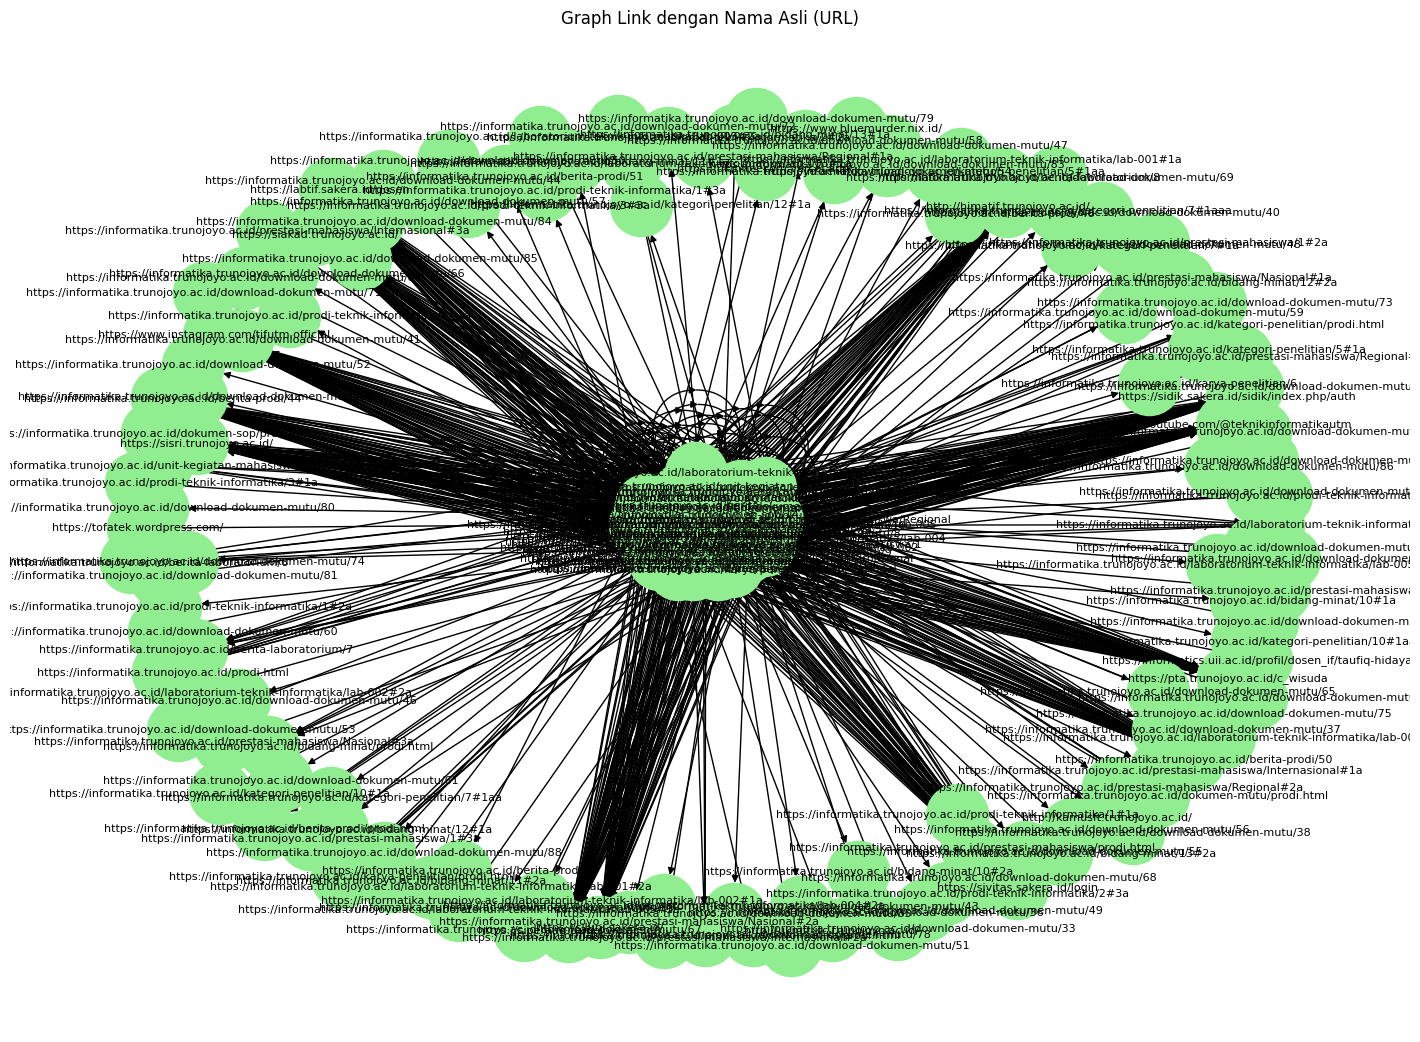

In [ ]:
G = nx.DiGraph()
for _, row in df.iterrows():
    G.add_edge(row["page"], row["link keluar"])

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.5, seed=42)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightgreen",
        font_size=8, arrows=True)

plt.title("Graph Link dengan Nama Asli (URL)")
plt.axis("off")

plt.savefig("graf_url.png", dpi=300, bbox_inches="tight")
plt.show()